In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('model_training.csv')
df = data.copy()
target = df['Price_euros']
df.drop(columns=['Price_euros', 'Inches'], inplace = True)
df.head()

,Company,TypeName,ScreenResolution,Ram(GB),OpSys,Weight(kg),HDD,SSD,TouchScreen,IPS,PPI,CpuName,GpuBrand
0,1,1,11,8,2,1.37,0,128,0,1,226.98,33,1
1,1,1,2,8,2,1.34,0,0,0,0,127.68,33,1
2,2,2,4,8,4,1.86,0,256,0,0,141.21,33,1
3,1,1,13,16,2,1.83,0,512,0,1,220.53,34,0
4,1,1,11,8,2,1.37,0,256,0,1,226.98,33,1


In [3]:
# let's split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.15, random_state=2)

X_train.shape, X_test.shape

((1106, 13), (196, 13))

In [4]:
# let's define all the models
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
kn_reg = KNeighborsRegressor()
decision_tree = DecisionTreeRegressor()
gb_reg = GradientBoostingRegressor()
rf = RandomForestRegressor()


In [5]:
regressors = [lr, ridge, lasso, kn_reg, decision_tree, gb_reg, rf]
model_name = ['Linear Regression', 'Ridge', 'Lasso', 
                'KNeighbor Regression', 'Decision Tree', 'GradientBoost Regression', 'Random Forest']

In [6]:
i = 0
for reg in regressors:
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    print(model_name[i])
    print("\tMean absolute error:", mean_absolute_error(predictions, y_test).round(2))
    print("\tR-squared score:", r2_score(predictions, y_test).round(2))
    print()
    i += 1

Linear Regression
	Mean absolute error: 253.63
	R-squared score: 0.62

Ridge
	Mean absolute error: 253.6
	R-squared score: 0.62

Lasso
	Mean absolute error: 253.31
	R-squared score: 0.62

KNeighbor Regression
	Mean absolute error: 224.7
	R-squared score: 0.65

Decision Tree
	Mean absolute error: 183.14
	R-squared score: 0.79

GradientBoost Regression
	Mean absolute error: 189.19
	R-squared score: 0.73

Random Forest
	Mean absolute error: 170.75
	R-squared score: 0.81



Random Forest regressor performed the best.

# Price Prediction

In [7]:
# let's predict the price
prediction = rf.predict(df)
predicted_price = prediction


In [8]:
# save df to csv
df.to_csv('final_df.csv', index=False)

/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


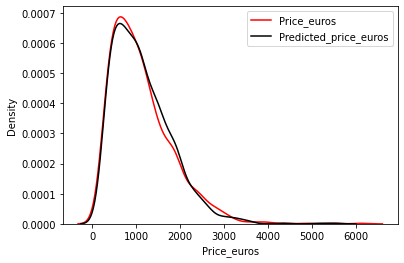

In [9]:
# let's visualize the price and predicted price on the same plot
sns.distplot(target, hist=False, color='red', label='Price_euros')
sns.distplot(predicted_price, hist=False, color='black', label='Predicted_price_euros')
plt.legend()

In [10]:
# Save prediction as a pickle file
laptop_file = open('RF_model.pkl', 'wb')
pkl.dump(rf, laptop_file)
laptop_file.close()

In [11]:
X_train.columns

Index(['Company', 'TypeName', 'ScreenResolution', 'Ram(GB)', 'OpSys',
       'Weight(kg)', 'HDD', 'SSD', 'TouchScreen', 'IPS', 'PPI', 'CpuName',
       'GpuBrand'],
      dtype='object')